In [1]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/103/691/original/Credit_Card_Customer_Data.csv

--2025-03-19 15:51:40--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/103/691/original/Credit_Card_Customer_Data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.183, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16483 (16K) [text/plain]
Saving to: ‘Credit_Card_Customer_Data.csv’

Credit_Card_Custome 100%[===================>]  16.10K  --.-KB/s    in 0.001s  

2025-03-19 15:51:40 (16.6 MB/s) - ‘Credit_Card_Customer_Data.csv’ saved [16483/16483]



In [2]:
import pandas as pd

df = pd.read_csv('Credit_Card_Customer_Data.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sl_No                660 non-null    int64 
 1   Customer Key         660 non-null    int64 
 2   Avg_Credit_Limit     660 non-null    int64 
 3   Total_Credit_Cards   660 non-null    int64 
 4   Total_visits_bank    660 non-null    int64 
 5   Total_visits_online  660 non-null    int64 
 6   Total_calls_made     660 non-null    int64 
 7   Card_Group           660 non-null    object
dtypes: int64(7), object(1)
memory usage: 41.4+ KB


In [3]:
# Create a new categorical column for total credit cards
def categorize_credit_cards(x):
    if x <= 2:
        return 'Low'
    elif x <= 4:
        return 'Medium'
    else:
        return 'High'

df['Card_Group'] = df['Total_Credit_Cards'].apply(categorize_credit_cards)

# Quick check of the distribution
print(df['Card_Group'].value_counts())

Card_Group
High      333
Medium    204
Low       123
Name: count, dtype: int64


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Separate the Avg_Credit_Limit based on the Card_Group
low_cards = df[df['Card_Group'] == 'Low']['Avg_Credit_Limit']
med_cards = df[df['Card_Group'] == 'Medium']['Avg_Credit_Limit']
high_cards = df[df['Card_Group'] == 'High']['Avg_Credit_Limit']

# Perform ANOVA
f_stat, p_val = f_oneway(low_cards, med_cards, high_cards)

print("F-Statistic:", f_stat)
print("p-value:", p_val)

F-Statistic: 71.47290982194048
p-value: 8.219125300252465e-29


In [6]:
from scipy.stats import chisquare

# Observed counts
observed_counts = df['Card_Group'].value_counts().sort_index()
# Let's say we expect them to be equally distributed, i.e., 1/3 each
n_total = observed_counts.sum()
expected_counts = [n_total/3] * 3  # 3 groups: Low, Medium, High

# Perform Chi-Square Goodness of Fit
chi_stat, p_val = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print("Observed counts:", observed_counts.values)
print("Expected counts:", expected_counts)
print("Chi-Square Statistic:", chi_stat)
print("p-value:", p_val)

Observed counts: [333 123 204]
Expected counts: [np.float64(220.0), np.float64(220.0), np.float64(220.0)]
Chi-Square Statistic: 101.97272727272727
p-value: 7.192893340211705e-23


In [7]:
def categorize_online_visits(x):
    # Example rule: 0-5 = Low visits, >5 = High visits
    return 'LowOnline' if x <= 5 else 'HighOnline'

df['Online_Group'] = df['Total_visits_online'].apply(categorize_online_visits)

# Check distribution
print(df['Online_Group'].value_counts())

Online_Group
LowOnline     609
HighOnline     51
Name: count, dtype: int64


In [8]:
import scipy.stats as stats

# Create a contingency table between Card_Group and Online_Group
contingency_table = pd.crosstab(df['Card_Group'], df['Online_Group'])
print(contingency_table)

# Perform Chi-Square Test for Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

Online_Group  HighOnline  LowOnline
Card_Group                         
High                  50        283
Low                    0        123
Medium                 1        203
Chi-Square Statistic: 50.090008190473526
p-value: 1.327678499105571e-11
Degrees of Freedom: 2
Expected Frequencies: [[ 25.73181818 307.26818182]
 [  9.50454545 113.49545455]
 [ 15.76363636 188.23636364]]


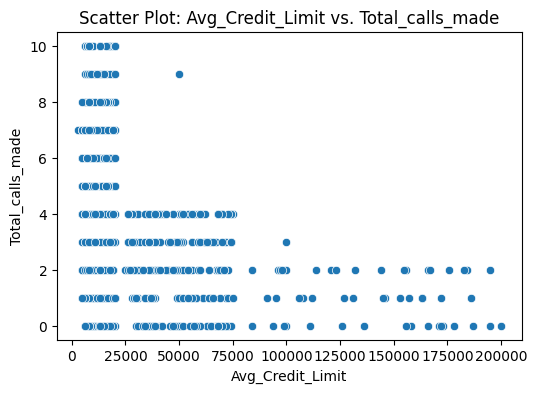

Pearson Correlation Matrix:
                  Avg_Credit_Limit  Total_calls_made
Avg_Credit_Limit          1.000000         -0.414352
Total_calls_made         -0.414352          1.000000


In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_calls_made', data=df)
plt.title("Scatter Plot: Avg_Credit_Limit vs. Total_calls_made")
plt.show()

pearson_corr = df[['Avg_Credit_Limit', 'Total_calls_made']].corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr)